In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [13]:
access_token="2945289565-wRN9KXAVXe1B79dHB8Hlr2gtObWSi0shPh2bQ3L"
access_token_secret="n4qoueWhjt8bpcstB9GnzyL4kB3mA31xi3FhFtWfx4ug9"
consumer_key="29LdhaAyfobKT0J2T3rFUEvFk"
consumer_secret="h82EHiAGzVlZJ7goHnJWuG6LG2m6GeormqacrADqDtuefCp5xs"


In [14]:
#Basic Listener to print incoming tweets
class StdOutListener(StreamListener):
    def on_data(self,data):
        print(data)
        return True
    
    def on_error(self,status):
        print(status)
        

In [29]:
#Handles Twitter Auth and Connection to Twitter A/C
print(StreamListener)
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
stream = Stream(auth,l)
api = tweepy.API(auth)
#This Filters Streams to capture data by Keyword
#stream.filter(track = ['python','javascript','ruby'])


<class 'tweepy.streaming.Stream'>


In [32]:
user = api.me()
#print(user)
print('Name: ' + user.name)
print("Location: " + user.location)
print('Friends: ' + str(user.friends_count))

Name: Jitendra Purohit
Location: Mumbai, India
Friends: 151


In [44]:
tweets = api.user_timeline(screen_name = 'realDonaldTrump' , count = 20,tweet_mode="extended")
#print(tweets)
datet = []

for tweet in tweets:
    #print(tweet.created_at)
    datet.append(tweet.created_at)
#print(datet)
tmp = []

tweets_for_csv = [tweet.full_text for tweet in tweets]
for j in tweets_for_csv:
    tmp.append(j)


In [39]:
len(tmp)

200

In [68]:
from country_list import countries
#print(countries)

In [60]:
def fetch_tweets(id,count = 20):
    tmp = []
    for tweet in tweepy.Cursor(api.user_timeline, id, tweet_mode = "extended").items(count):
        tmp.append(tweet.full_text)
    return tmp


In [61]:
def read_sent_CSV(filename,delimiter = " "):
    df = pd.read_csv(filename)
    full_data = df.values.tolist()
    return full_data

In [81]:
def review_sent(tweets,neg_sents,pos_sents):
    ref_countries = {}
    sent_review = {}
    for country in countries:
        sent_c  = 0
        for tweet in tweets:
            if country['name'] in tweet:
                for sent in neg_sents:
                    if sent[0] in tweet:
                        sent_c -=1
                for sent in pos_sents:
                    if sent[0] in tweet:
                        sent_c +=1
                if country['name'] not in sent_review:
                    sent_review[country['name']] = 0
                if country['name'] not in ref_countries:
                    ref_countries[country['name']] = 0
                ref_countries[country['name']]+= 1
                sent_review[country['name']] = sent_c
    return ref_countries,sent_review

In [82]:
neg_sents = read_sent_CSV('negative_sent.csv')
#print(neg_sents)
pos_sents = read_sent_CSV('positive_sent.csv')

In [78]:
delegates = ['narendramodi' , 'realDonaldTrump', 'POTUS44']
sent_analysis = {}
for delegate in delegates:
    tweets = fetch_tweets(delegate,200)
    ref_countries , sent_review = review_sent(tweets,neg_sents,pos_sents)
    sent_analysis[delegate] = sent_review
print(ref_countries)
print(sent_review)

{'Russia': 3, 'Uzbekistan': 1, 'Mali': 2, 'Germany': 1, 'Algeria': 1, 'North Korea': 5, 'Japan': 15, 'Liberia': 2, 'Jordan': 1, 'Australia': 2, 'Switzerland': 1, 'Israel': 1, 'Pakistan': 1, 'Mexico': 7, 'Indonesia': 2, 'Syria': 4, 'Singapore': 2, 'Bahamas': 1, 'Bulgaria': 1, 'United States': 8, 'India': 66, 'Iran': 5, 'Laos': 2, 'Myanmar': 2, 'Canada': 2, 'Nepal': 1, 'Saudi Arabia': 2, 'Italy': 2, 'Cuba': 10, 'Turkey': 1, 'Brazil': 2, 'Colombia': 2, 'Croatia': 1, 'Bahrain': 1, 'France': 1, 'South Korea': 4}
{'Liberia': 3, 'Cuba': -2, 'Mali': 0, 'India': 0, 'Colombia': -1, 'Laos': -2, 'Mexico': 1, 'Canada': 2, 'Syria': -3}


In [83]:
delegate_countries = {'narendramodi':'India' ,'realDonaldTrump': 'United States' , 'POTUS44':'United States'}

print(sent_analysis)


{'realDonaldTrump': {'Russia': -4, 'Japan': -9, 'North Korea': 8, 'India': 3, 'Iran': -12, 'Bahamas': -1, 'Jordan': 1, 'Australia': 0, 'Brazil': 2, 'United States': 3, 'Bahrain': 1, 'Mexico': 3, 'South Korea': 6}, 'POTUS44': {'Liberia': 3, 'Cuba': -2, 'Mali': 0, 'India': 0, 'Colombia': -1, 'Laos': -2, 'Mexico': 1, 'Canada': 2, 'Syria': -3}, 'narendramodi': {'Russia': 0, 'Uzbekistan': -5, 'Saudi Arabia': 1, 'Algeria': 0, 'Japan': -13, 'Singapore': 2, 'Australia': 5, 'Israel': -2, 'Pakistan': 0, 'Mexico': 0, 'Indonesia': -3, 'Bulgaria': -1, 'India': 32, 'Myanmar': -4, 'Switzerland': -1, 'Nepal': 0, 'Germany': 3, 'Italy': 2, 'Turkey': -2, 'Brazil': -1, 'Croatia': 0, 'France': 0}}


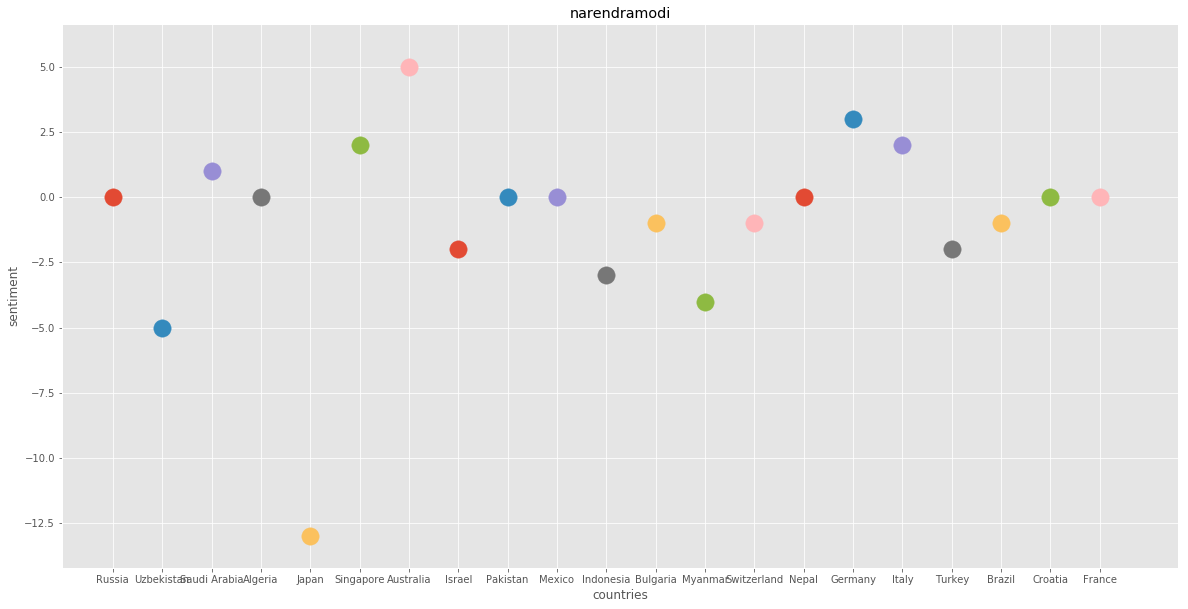

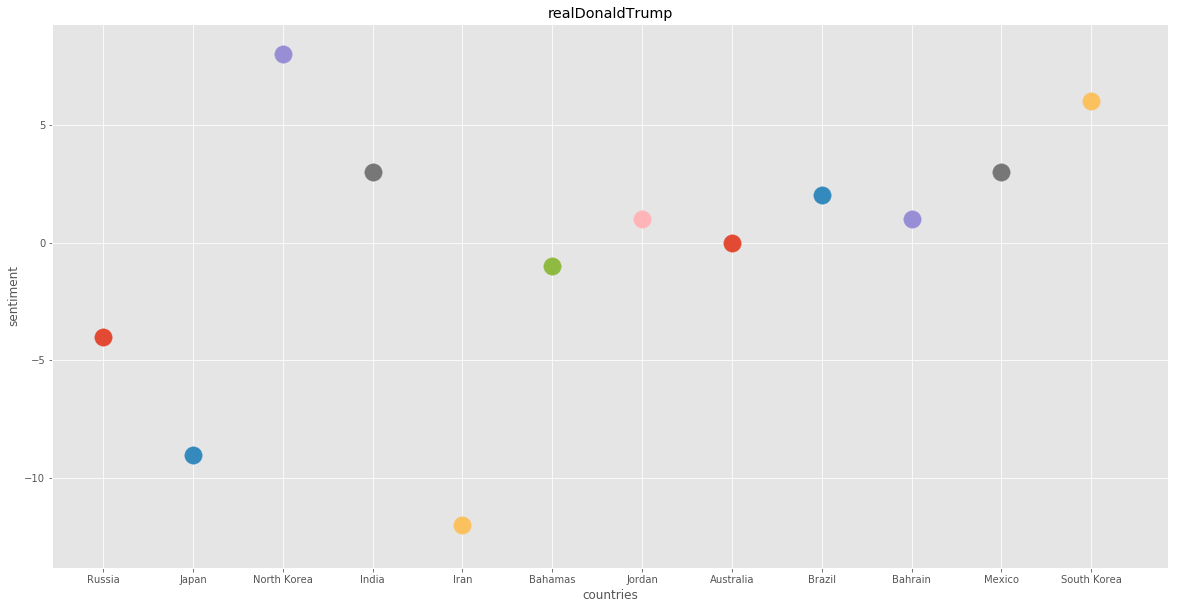

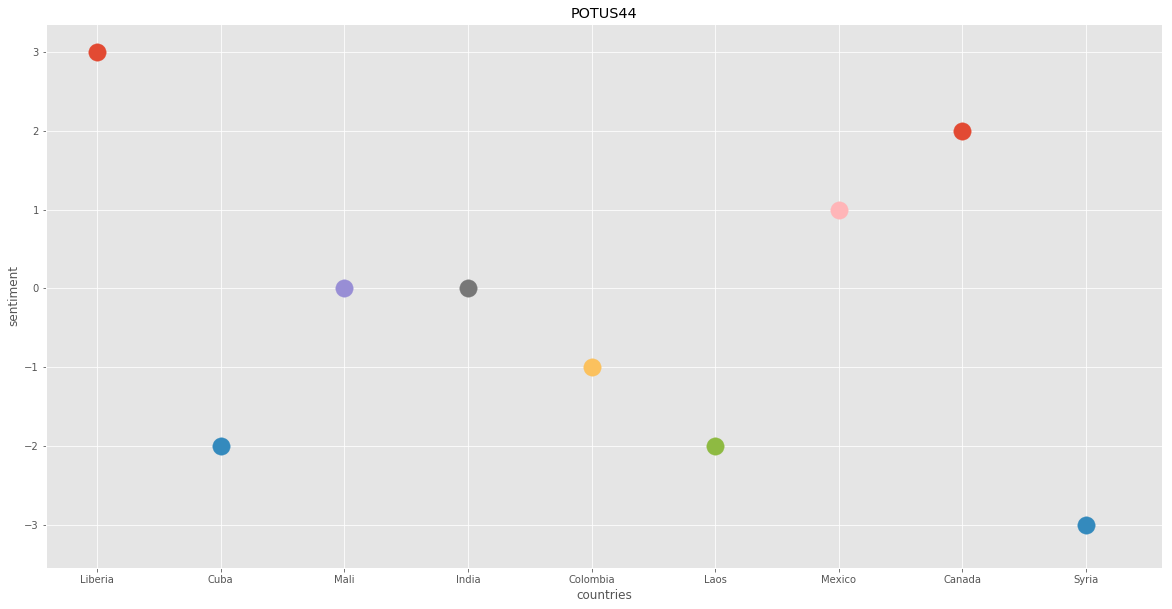

In [90]:
for delegate in delegates:
    plt.title(delegate)
    plt.xlabel('countries')
    plt.ylabel('sentiment')
    for country in sent_analysis[delegate]:
        if country != delegate_countries[delegate]:
            plt.scatter(country,sent_analysis[delegate][country],s=300)
    fig = plt.gcf()
    fig.set_size_inches(20,10)
    plt.show()